In [1]:
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv('lefthand_abnormal_2.csv',header = None)
data1 = data.iloc[:,1:].values
data1[:6000,0]

array([ 0.        , -0.54931641, -0.42724609, ...,  0.        ,
        0.        ,  0.        ])

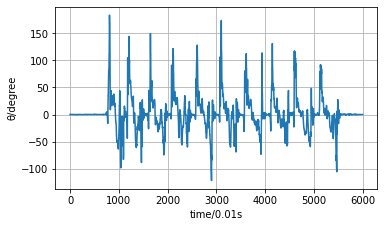

In [15]:
import matplotlib.pyplot as plt
x = [i for i in range(6000)]
plt.figure(figsize=(14.65/2.54,8.5/2.54))
plt.grid()
plt.plot(x,data1[:6000,0])
plt.xlabel('time/0.01s')
plt.ylabel('θ/degree')
plt.savefig('testing.png',dpi = 300)

In [16]:
import matplotlib.pyplot as plt
data1 = data.iloc[:,1:]
dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [17]:
np.array(dat.iloc[:,:].values)[:,0].max()

1.0

In [18]:
mat = np.transpose(np.array(dat))
mat.shape

(9, 6028)

In [19]:
U,S,VT =np.linalg.svd(mat)

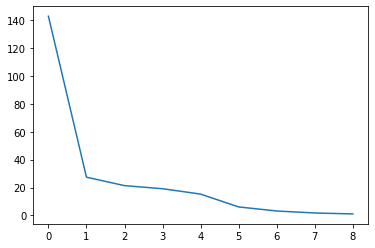

In [20]:
plt.plot(S)

In [21]:
VT.shape

(6028, 6028)

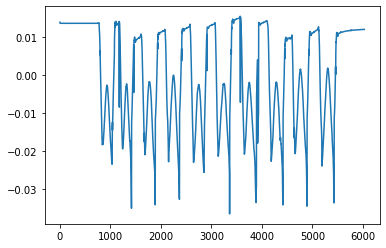

In [22]:
plt.plot(VT[1,:])

In [23]:
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel

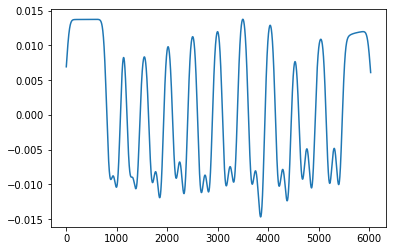

In [29]:
gauss_kernel = Gaussian1DKernel(50)
smoothed_data_gauss = convolve(VT[1,:], gauss_kernel)
plt.plot(smoothed_data_gauss )

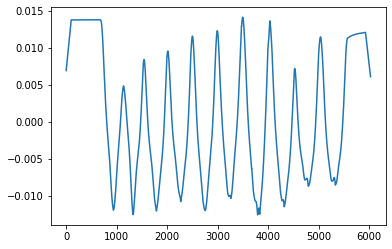

In [39]:
box_kernel = Box1DKernel(200)
smoothed_data_box = convolve(VT[1,:], box_kernel)
plt.plot(smoothed_data_box, label='Box1DKernel')

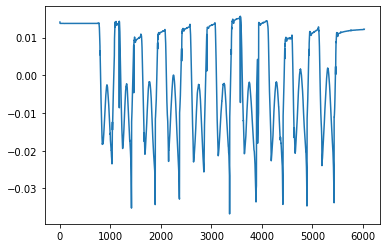

In [54]:
from astropy.convolution import RickerWavelet1DKernel
ricker_1d_kernel = RickerWavelet1DKernel(0.25)
smoothed_data_ricker = convolve(VT[1,:], ricker_1d_kernel)
plt.plot(smoothed_data_ricker, label='rickerKernel')

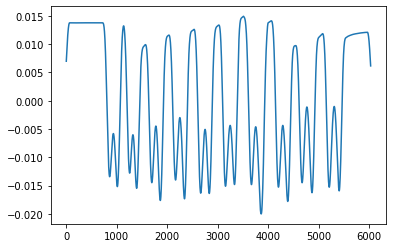

In [60]:
from astropy.convolution import Trapezoid1DKernel
Trapezoid1D_kernel = Trapezoid1DKernel(30, slope=0.02)
smoothed_data_Trapezoid = convolve(VT[1,:], Trapezoid1D_kernel)
plt.plot(smoothed_data_Trapezoid, label='TrapezoidKernel')


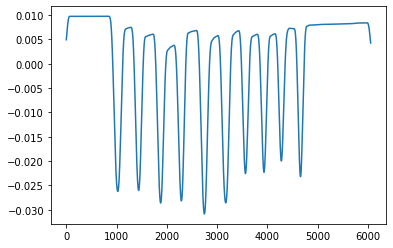

In [61]:
data = pd.read_csv('lefthand_abnormal_1.csv',header = None)
data1 = data.iloc[:,1:]
dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
mat = np.transpose(np.array(dat))
U,S,VT =np.linalg.svd(mat)
Trapezoid1D_kernel = Trapezoid1DKernel(30, slope=0.02)
smoothed_data_Trapezoid = convolve(VT[1,:], Trapezoid1D_kernel)
plt.plot(smoothed_data_Trapezoid, label='TrapezoidKernel')

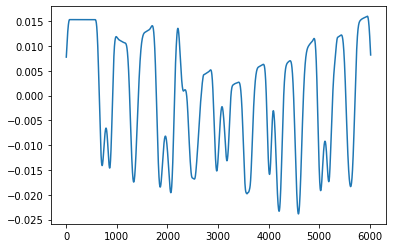

In [82]:
data = pd.read_csv('lefthand_mixed.csv',header = None)
data1 = data.iloc[:,1:]
data1 = -data1
dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
mat = np.transpose(np.array(dat))
U,S,VT =np.linalg.svd(mat)
# plt.plot(VT[1,:])
Trapezoid1D_kernel = Trapezoid1DKernel(30, slope=0.02)
smoothed_data_Trapezoid = convolve(VT[1,:], Trapezoid1D_kernel)
plt.plot(smoothed_data_Trapezoid, label='TrapezoidKernel')

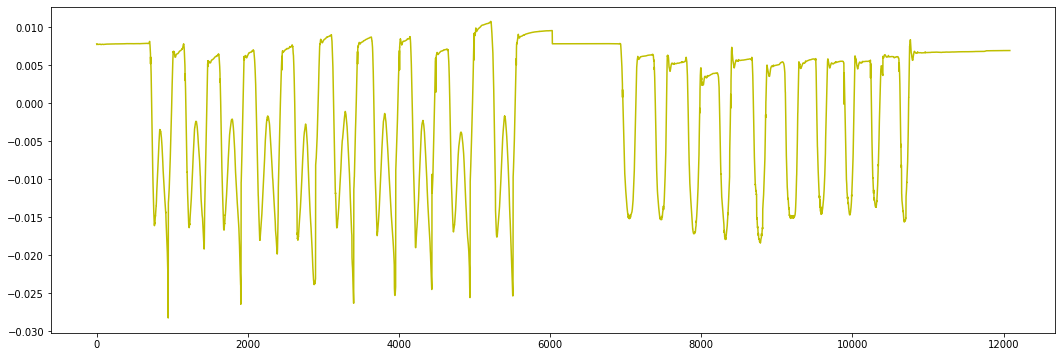

In [79]:
data = pd.read_csv('lefthand_normal_1.csv',header = None)
data1 = data.iloc[:,1:]
data_ab = pd.read_csv('lefthand_abnormal_1.csv',header = None)
data2 = data_ab.iloc[:,1:]
data1=data1.append(data2)
dat = data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
mat = np.transpose(np.array(dat))
U,S,VT =np.linalg.svd(mat)
Trapezoid1D_kernel = Trapezoid1DKernel(30, slope=0.02)
smoothed_data_Trapezoid = convolve(VT[1,:], Trapezoid1D_kernel)
plt.figure(figsize=(18,6))
# plt.plot(smoothed_data_Trapezoid, label='TrapezoidKernel',color = 'b')
# plt.savefig('norm+abnorm+filter.png',dpi = 300)
plt.plot(VT[1,:],label = 'original_svd',color='y')
plt.savefig('norm+abnorm.png',dpi = 300)

In [77]:
from scipy.fftpack import fft
import scipy

(0.0, 1.0)

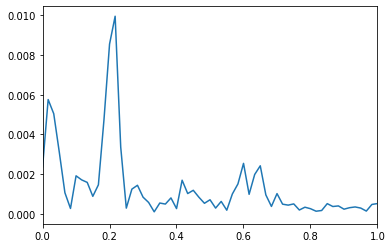

In [78]:
N = 6000
T = 1/100
x = np.linspace(0,N*T,N)
y = VT[1,:6000]
y_f = scipy.fft.fft(y)
x_f = np.linspace(0,1/(2*T),N//2)
plt.plot(x_f,2/N*np.abs(y_f[:N//2]))
plt.xlim([0,1])

In [79]:
from scipy.fftpack import fft, fftfreq
sample_freq = fftfreq(y_f.size)
power = np.abs(y_f)

In [80]:
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powers = power[pos_mask]

In [81]:
top_k_seasons = 3
# top K=3 index
top_k_idxs = np.argpartition(powers, -top_k_seasons)[-top_k_seasons:]
top_k_power = powers[top_k_idxs]
fft_periods = (1 / freqs[top_k_idxs]).astype(int)

In [82]:
period = fft_periods[1]
print(period/100)

5.0


In [83]:
print(f"top_k_power: {top_k_power}")
print(f"fft_periods: {fft_periods}")

top_k_power: [17.27195114 25.6557565  29.8549803 ]
fft_periods: [6000  500  461]
